<a href="https://colab.research.google.com/github/sunanda-debnath/Yes-Bank-Stock-Predication/blob/main/Yes__Bank__Stock_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**
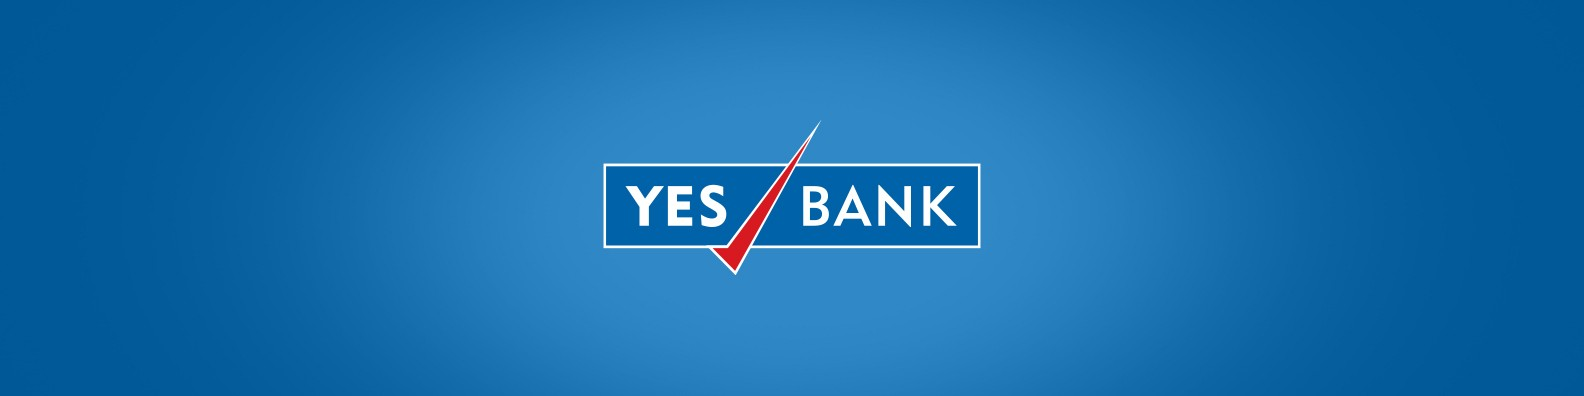

**Problem statement:** Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

**Understanding the Problem Statement:** Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. psychological, rational and irrational behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

*  Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
*  Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

Our focus will be on the technical analysis part. We’ll be using a dataset.

**What is stock?**

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:



*   **Date:** It denotes date of investment done (in our case we have month and year).
*   **Open:** Open means the price at which a stock started trading when the opening bell rang.
*   **High:** High refer to the maximum prices in a given time period.

*   **Low:** Low refer to the minimum prices in a given time period.
*   **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.
```



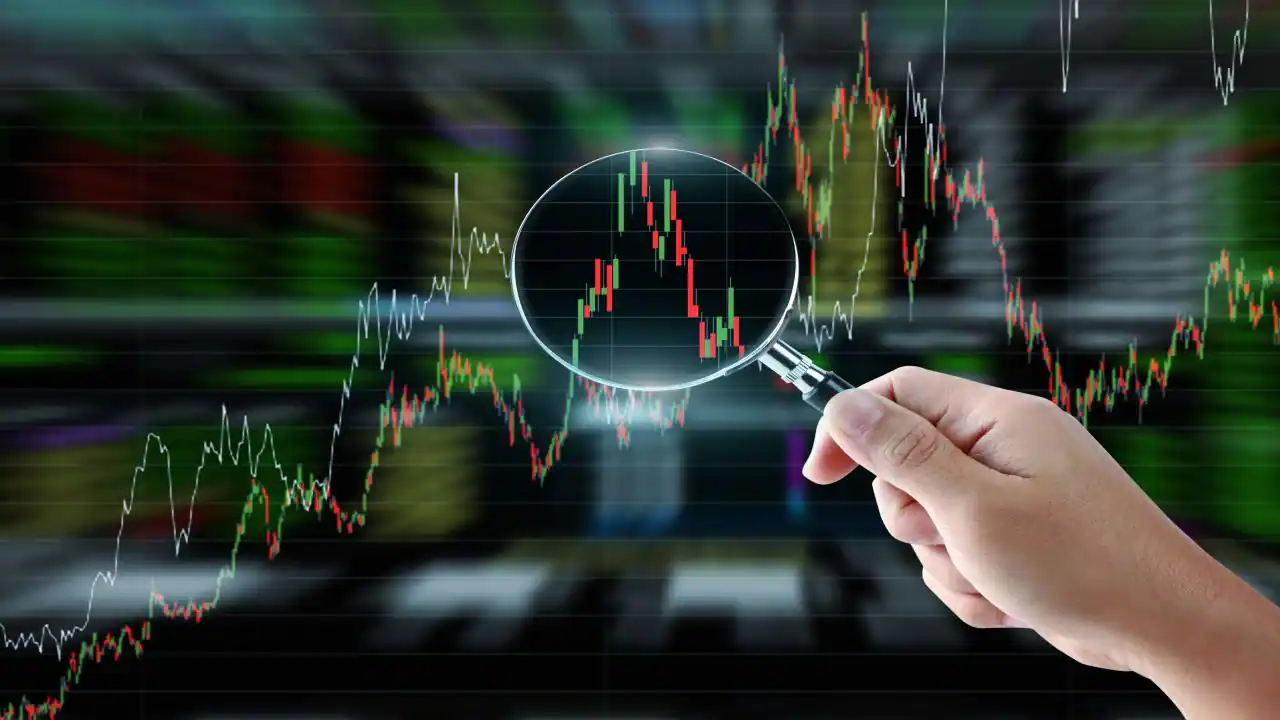

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project 2/data_YesBank_StockPrices.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.shape

(185, 5)

In [ ]:
df.info

<bound method DataFrame.info of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#check null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

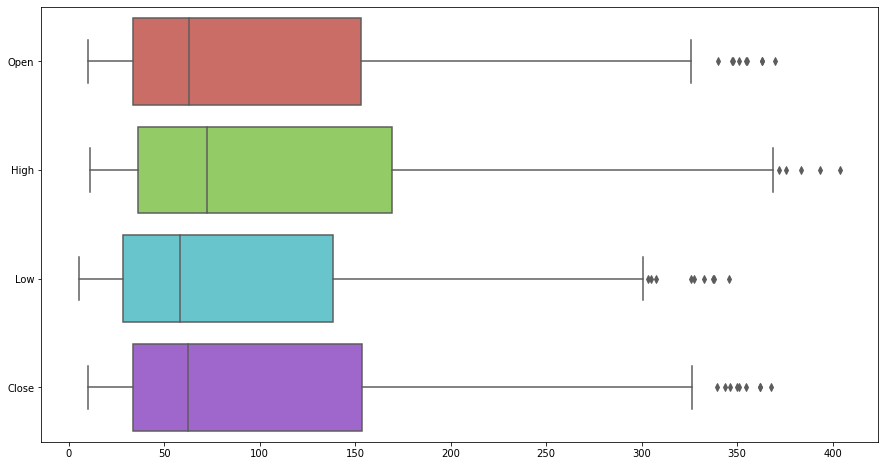

In [ ]:
#checking outliers 
plt.figure(figsize= (15, 8))
sns.boxplot(data=df, orient="h", palette="hls")

# **Exploratory Data Analysis**

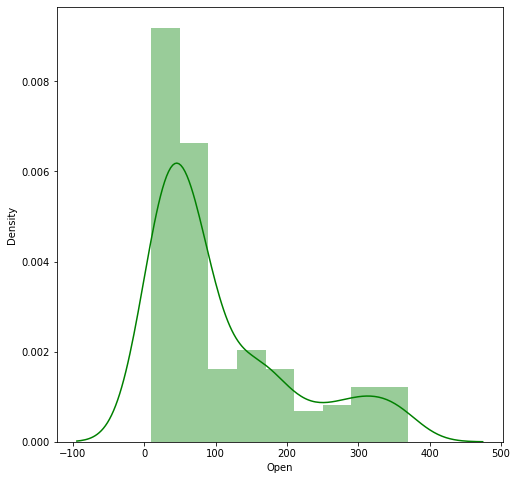

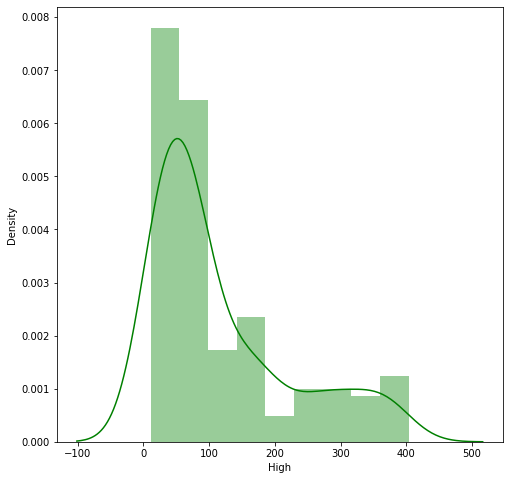

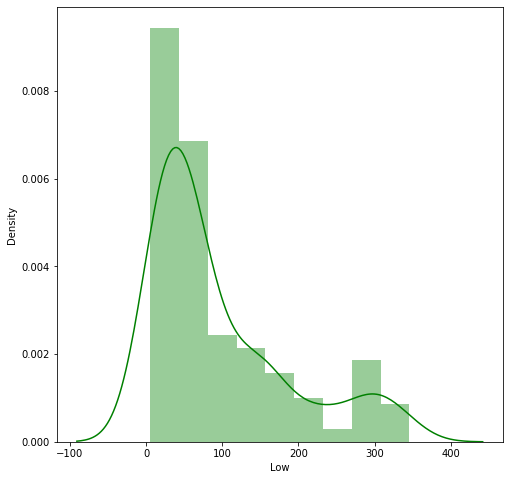

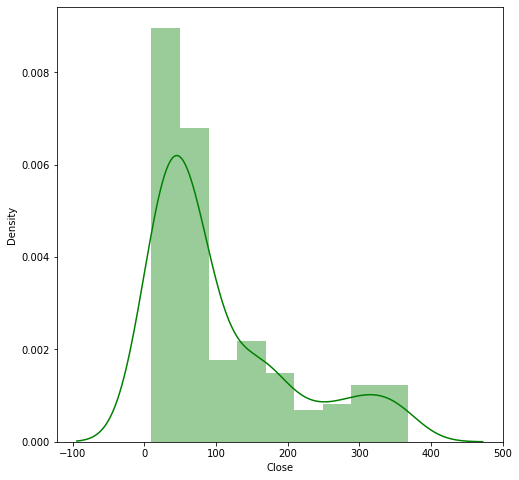

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df['Open'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['High'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Low'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Close'], color='g')

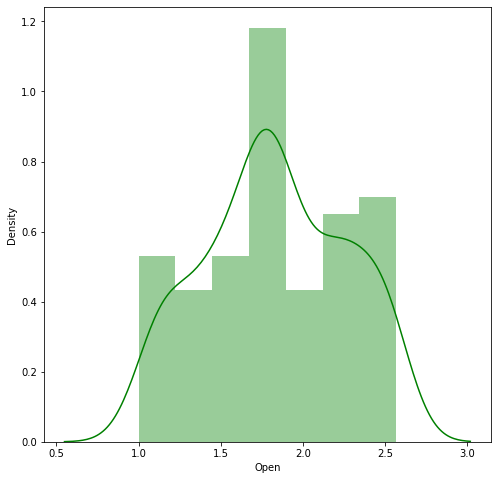

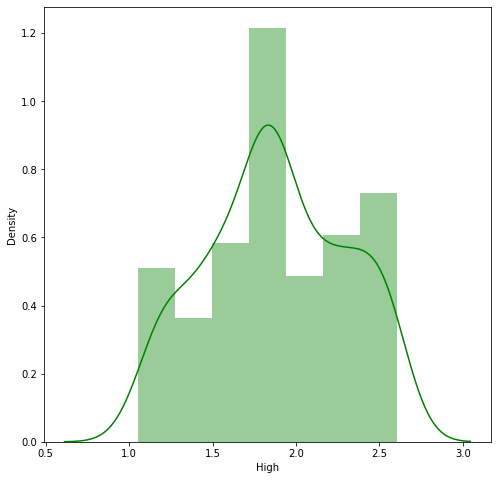

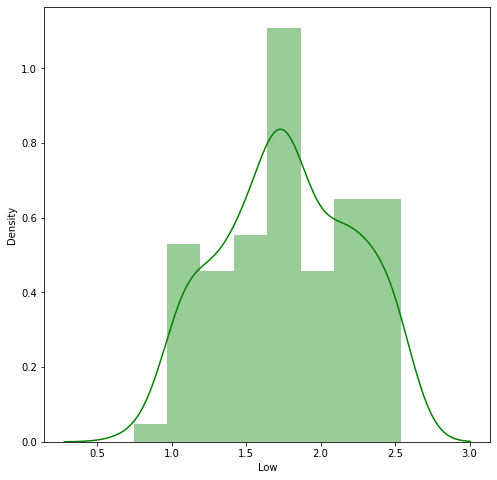

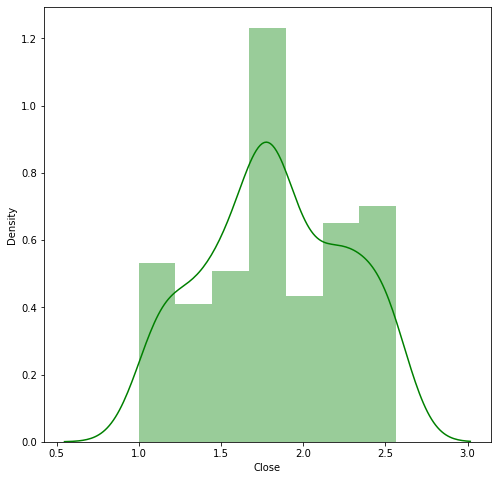

In [ ]:
# Normal Distribution 
plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Open']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['High']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Low']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Close']), color='g')

**Multivariate Analysis**

In [ ]:
#Convertting Date column from object to date type(Data wrangling)
df['Date']= pd.to_datetime(df['Date'], format= '%b-%y')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
Yearly_df= df.groupby('Date')['Close'].mean().reset_index()
Yearly_df.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


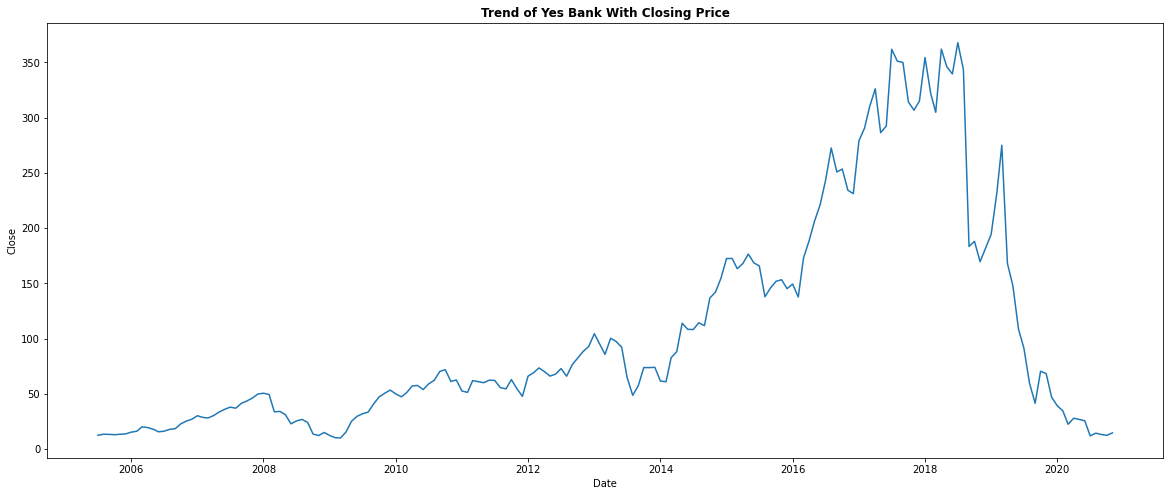

In [ ]:
plt.figure(figsize= [20, 8])
plt.title("Trend of Yes Bank With Closing Price", fontweight = 'bold')
sns.lineplot(data=Yearly_df, x= 'Date', y= 'Close', palette= 'husl' )

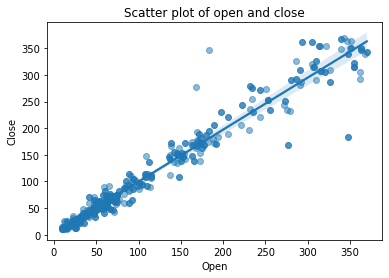

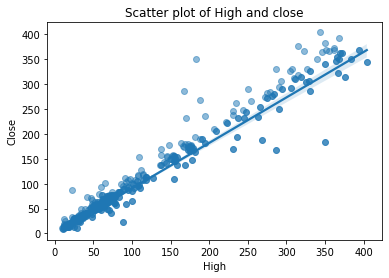

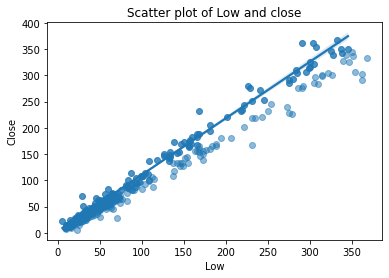

In [ ]:
# To find relational between dependent variable and independent variable

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()


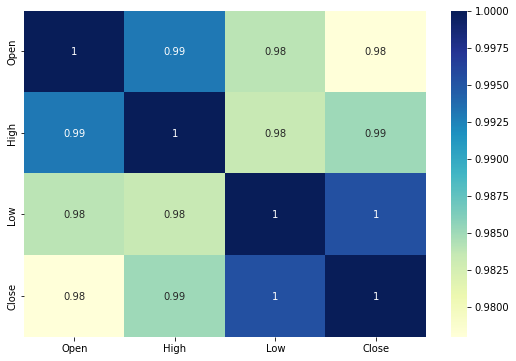

In [ ]:
#Let's get the heatmmap of the Numerical Variables
plt.figure(figsize= (9, 6))
Coorelation_matrix= df.corr()
sns.heatmap(Coorelation_matrix, annot= True, cmap= 'YlGnBu')

**Feature Engineering**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# Let's create a month and year column from the Date column
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year

In [ ]:
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [ ]:
df.index= df['Date']
df.drop('Date', axis= 1, inplace= True)

In [ ]:
df.head()

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,7,2005
2005-08-01,12.58,14.88,12.55,13.42,8,2005
2005-09-01,13.48,14.87,12.27,13.30,9,2005
2005-10-01,13.20,14.47,12.40,12.99,10,2005
2005-11-01,13.35,13.88,12.88,13.41,11,2005


Feature Selection

In [ ]:
#Removing Multicollinearity between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif['Variables']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
df.drop('Open',axis=1,inplace=True)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


In [ ]:
df.drop('High',axis=1,inplace=True)

In [ ]:
df.head()

,Low,Close,Month,Year
Date,,,,
2005-07-01,11.25,12.46,7,2005
2005-08-01,12.55,13.42,8,2005
2005-09-01,12.27,13.30,9,2005
2005-10-01,12.40,12.99,10,2005
2005-11-01,12.88,13.41,11,2005


**One Hot Encoding **

In [ ]:
new_df=pd.get_dummies(df,columns=['Year'])

In [ ]:
new_df.head()

,Low,Close,Month,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,
2005-07-01,11.25,12.46,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.55,13.42,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-01,12.27,13.30,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-10-01,12.40,12.99,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-11-01,12.88,13.41,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Standardizing the data**

In [ ]:
independent_features= [col for col in new_df if col not in ['Close', 'Month']]
len(independent_features)

17

In [ ]:
#applying zscore to selected independent variables 
X = round(new_df[independent_features].apply(zscore),3)

#applying log on dependent variable
y = np.log10(new_df['Close'])

In [ ]:
X.head()

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2005-07-01,-0.920,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-08-01,-0.906,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-09-01,-0.909,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-10-01,-0.907,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-11-01,-0.902,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251


In [ ]:
y.head()

Date
2005-07-01    1.095518
2005-08-01    1.127753
2005-09-01    1.123852
2005-10-01    1.113609
2005-11-01    1.127429
Name: Close, dtype: float64

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 17)
X_test:  (37, 17)
y_train:  (148,)
y_test:  (37,)


In [ ]:
#Creating DataFrames of train and test dataset
train_df= pd.DataFrame(X_train,y_train)
test_df= pd.DataFrame(10**y_test)
test_df.rename(columns= {'Close': 'Actual Closing Price'}, inplace= True)

**Linear Regression**

In [ ]:
#fitting the data into Regression model
lr=LinearRegression().fit(X_train,y_train)

In [ ]:
lr.score(X_train,y_train)

0.9403650204419233

In [ ]:
lr.intercept_

-58875444889.93402

In [ ]:
lr.coef_

array([3.05309444e-01, 7.90575959e+12, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.05553484e+13])

In [ ]:
y_pred=lr.predict(X_test)
print (y_pred)

[1.41558838 2.13433838 1.83746338 2.10699463 1.79840088 1.53277588
 2.40777588 1.24371338 1.09527588 2.31011963 2.53668213 1.97808838
 2.16949463 1.71246338 2.67730713 2.47027588 1.82965088 1.40386963
 2.25152588 1.75933838 1.33746338 2.02105713 2.14996338 1.77886963
 2.34918213 1.79840088 2.45074463 1.09527588 2.00152588 1.69293213
 2.71636963 2.46636963 1.87652588 2.21246338 1.55621338 1.75152588
 2.49371338]


In [ ]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(y_test,data)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("The model performance for test set:")
  print("--------------------------------------")
  print("Mean Squared Error: ",MSE)
  print("Root Mean Squared Error: ",RMSE)
  print("R2: ",r2)
  print("Adjusted R2: ",adjusted_r2)
  return

In [ ]:
evaluation_metrics(y_pred)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.008378716531125619
Root Mean Squared Error:  0.09153532941507131
R2:  0.9550214108859424
Adjusted R2:  0.9147774100996803


In [ ]:
test_df['LR Predicted Closing Price'] = 10**y_pred
test_df.head()

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,34.06,26.036846
2015-12-01,145.23,136.250586
2019-12-01,46.95,68.780191
2014-11-01,142.08,127.936548
2010-08-01,62.22,62.863836


In [ ]:
#Mean Absolute Error
MAE  = mean_absolute_percentage_error

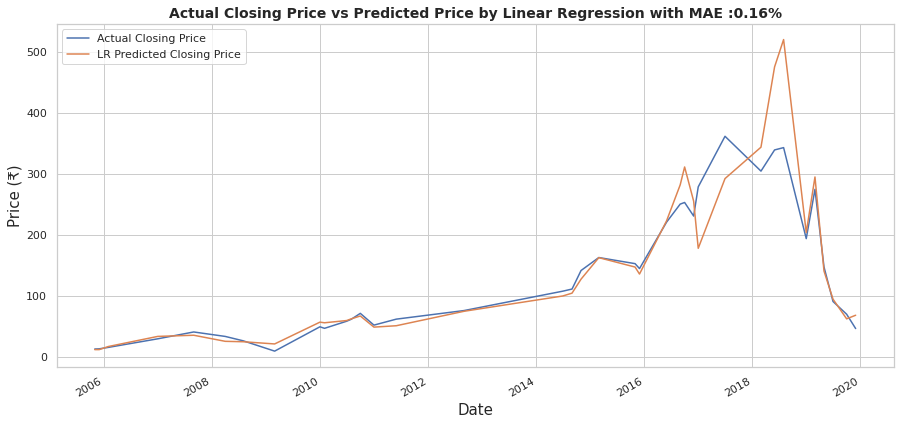

In [ ]:
#Graph between Actual Close price and Predicted Price
sns.set(style='whitegrid')
test_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

**Lasso Regression**

In [ ]:
lasso_reg= Lasso(alpha=0.001)

In [ ]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.001)

In [ ]:
lasso_reg.score(X_train, y_train)

0.9456881756779446

In [ ]:
lasso_y_pred= lasso_reg.predict(X_test)

In [ ]:
#Checking model Performance using different evaluation metrics for Lasso Regression Model
evaluation_metrics(lasso_y_pred)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009379605869086021
Root Mean Squared Error:  0.09684836534028864
R2:  0.9496484411579983
Adjusted R2:  0.9045970464046283


**Applying Cross Validation & Hyperparameter tuning on Lasso Regression**

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014 ]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print( "The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.01263071552015855


In [ ]:
y_pred_lasso= lasso_regressor.predict(X_test)

In [ ]:
#Getting evaluation metrics for Lasso CV
evaluation_metrics(y_pred_lasso)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009376701436556797
Root Mean Squared Error:  0.09683336943717696
R2:  0.9496640327198869
Adjusted R2:  0.9046265883113646


In [ ]:
# Data frame for Actual closing price and Lasso Predicted Closing Price 
test_df['Lasso Predicted Closing Price']= 10**y_pred_lasso
lasso_df= test_df.loc[:, ['Actual Closing Price', 'Lasso Predicted Closing Price']]
lasso_df.head()

,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,34.06,26.365934
2015-12-01,145.23,144.313848
2019-12-01,46.95,59.849779
2014-11-01,142.08,135.358269
2010-08-01,62.22,60.649159


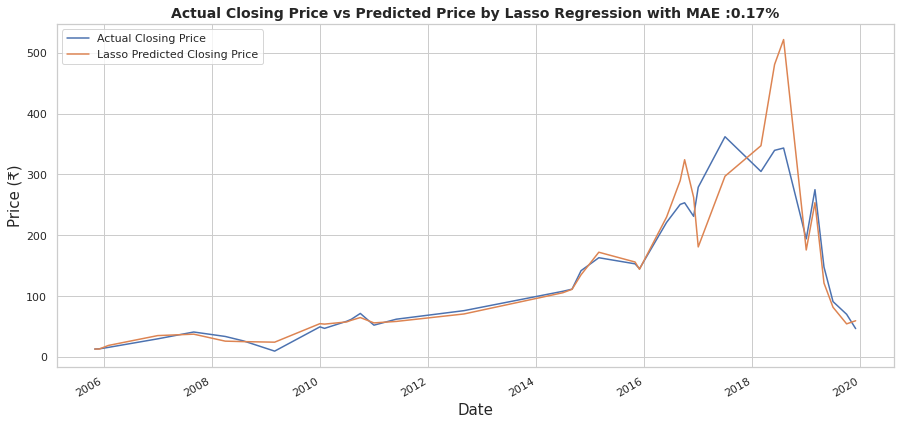

In [ ]:
#Graph between Actual Close price and Lasso Regression Predicted Price
lasso_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Lasso Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_lasso)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

**Ridge Regression**

In [ ]:
#Fitting the data into Ridge regression model
ridge_reg= Ridge(alpha= 0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_reg.score(X_train, y_train)

0.9457766805321504

In [ ]:
y_pred_r= ridge_reg.predict(X_test)

In [ ]:
#Getting evaluation metrics for Ridge regression
evaluation_metrics(y_pred_r)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009365359873489867
Root Mean Squared Error:  0.0967747894520565
R2:  0.9497249164487018
Adjusted R2:  0.9047419469554351


**Applying Cross Validation & Hyperparameter tuning on Ridge Regression**

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print( "The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 3}

Using  {'alpha': 3}  the negative mean squared error is:  -0.012538304166010358


In [ ]:
y_pred_ridge= ridge_regressor.predict(X_test)

In [ ]:
#Getting evaluation metrics for Ridge regression CV
evaluation_metrics(y_pred_ridge)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.008847513525776934
Root Mean Squared Error:  0.09406122222136461
R2:  0.9525048169276678
Adjusted R2:  0.9100091268103179


In [ ]:
# Data frame for Actual closing price and Ridge Predicted Closing Price 
test_df['Ridge Predicted Closing Price']= 10**y_pred_ridge
ridge_df= test_df.loc[:, ['Actual Closing Price', 'Ridge Predicted Closing Price']]
ridge_df.head()

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2008-04-01,34.06,26.142190
2015-12-01,145.23,146.673951
2019-12-01,46.95,64.154295
2014-11-01,142.08,129.931358
2010-08-01,62.22,60.731005


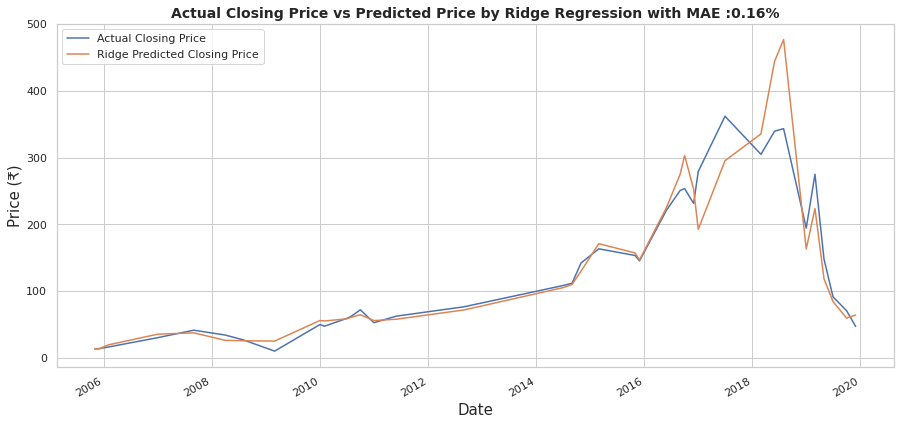

In [ ]:
#Graph between Actual Close price and Ridge Regression Predicted Price
ridge_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Ridge Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_ridge)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

**Elastic Net Regression**

In [ ]:
#Fitting the Data into ElasticeNet model
elasticnet_reg = ElasticNet(alpha= 0.01)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [ ]:
elasticnet_reg.score(X_train, y_train)

0.9437158786955572

In [ ]:
y_pred_e= elasticnet_reg.predict(X_test)

In [ ]:
#Getting evaluation metrics for ElasticNet regression model
evaluation_metrics(y_pred_e)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009333548588491178
Root Mean Squared Error:  0.09661029235278805
R2:  0.9498956856484749
Adjusted R2:  0.905065509649742


**Applying Cross Validation & Hyperparameter tuning on ElasticNet Regression**

In [ ]:
#ElasticNet Hyperparameter tuning
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best fit value :" ,elastic_regressor.best_params_)
print("\nBy Using ",elastic_regressor.best_params_, " Negative mean squared error is: ", elastic_regressor.best_score_)

Best fit value : {'alpha': 0.01, 'l1_ratio': 0.3}

By Using  {'alpha': 0.01, 'l1_ratio': 0.3}  Negative mean squared error is:  -0.01233335084816529


In [ ]:
y_pred_elastic= elastic_regressor.predict(X_test)

In [ ]:
#Getting Evaluation metrics for ElasticNet after applying Cross-Validation
evaluation_metrics(y_pred_elastic)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009096377849834535
Root Mean Squared Error:  0.09537493302663198
R2:  0.9511688645612937
Adjusted R2:  0.9074778486424512


In [ ]:
# Data frame for Actual closing price and ElastictNet Predicted Closing Price 
test_df['ElasticNet Predicted Closing Price']= 10**y_pred_elastic
elasticnet_df= test_df.loc[:, ['Actual Closing Price', 'ElasticNet Predicted Closing Price']]
elasticnet_df.head()

,Actual Closing Price,ElasticNet Predicted Closing Price
Date,,
2008-04-01,34.06,26.763841
2015-12-01,145.23,142.542580
2019-12-01,46.95,59.677823
2014-11-01,142.08,130.999880
2010-08-01,62.22,60.162559


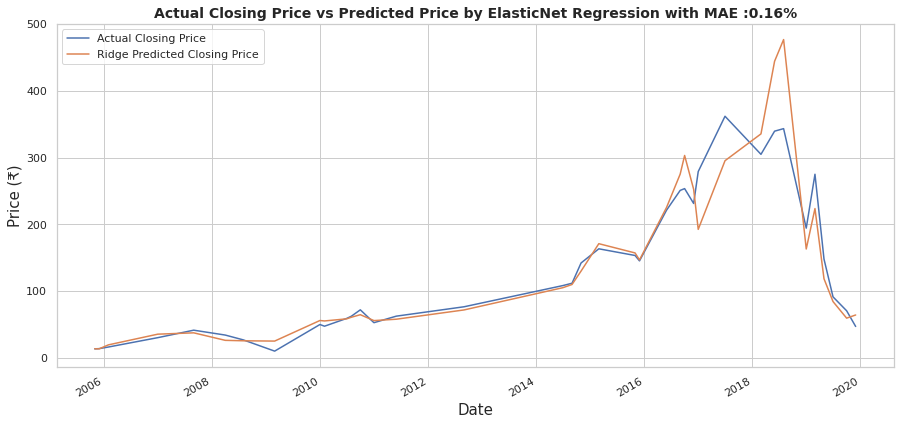

In [ ]:
#Graph between Actual Close price and ElastictNet Regression Predicted Price
ridge_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by ElasticNet Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_elastic)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

**Model Comparision Matrix**

In [ ]:
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [lr,lasso_regressor,ridge_regressor,elastic_regressor]

def error_matrix(Y):
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,Y)
  adj_r2 = 1-(1-r2_score(y_test,Y))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))

  return MSE,RMSE,r_2,adj_r2



comparision_df = pd.DataFrame(index = accuracy_list)
comparision_df['Linear Regression'] = error_matrix(y_pred)
comparision_df['Lasso'] = error_matrix(y_pred_lasso)
comparision_df['Ridge'] = error_matrix(y_pred_ridge)
comparision_df['ElasticNet'] = error_matrix(y_pred_elastic)
comparision_df

,Linear Regression,Lasso,Ridge,ElasticNet
MSE,0.008379,0.009377,0.008848,0.009096
RMSE,0.091535,0.096833,0.094061,0.095375
R2,0.955021,0.949664,0.952505,0.951169
Adjusted_R2,0.914777,0.904627,0.910009,0.907478
